In [1]:
#Import the libraries
import pandas as pd
import numpy as np

In [2]:
#Load the dataset
df = pd.read_csv("/home/rajeev21august3261/Capstone Project/machinery_data.csv")

In [3]:
df.head(15)

,sensor_1,sensor_2,sensor_3,operational_hours,maintenance,RUL
0,0.496714,1.399355,-0.675178,831,0,4167.779109
1,-0.138264,0.924634,-0.144519,4061,0,937.137258
2,0.647689,0.059630,-0.792420,4801,0,197.222359
3,1.523030,-0.646937,-0.307962,2604,0,2393.654227
4,-0.234153,0.698223,-1.893615,714,0,4285.083772
5,-0.234137,0.393485,0.213294,3906,0,1092.711130
6,1.579213,0.895193,0.001205,1819,0,3177.235519
7,0.767435,0.635172,-0.817089,4869,0,126.650001
8,-0.469474,1.049553,0.659246,1687,0,3307.410677
9,0.542560,-0.535235,0.937570,1711,0,3282.465782


In [4]:
df.describe

<bound method NDFrame.describe of      sensor_1  sensor_2  sensor_3  operational_hours  maintenance          RUL
0    0.496714  1.399355 -0.675178                831            0  4167.779109
1   -0.138264  0.924634 -0.144519               4061            0   937.137258
2    0.647689  0.059630 -0.792420               4801            0   197.222359
3    1.523030 -0.646937 -0.307962               2604            0  2393.654227
4   -0.234153  0.698223 -1.893615                714            0  4285.083772
..        ...       ...       ...                ...          ...          ...
995 -0.281100  1.070150  0.077481               1855            0  3048.815969
996  1.797687 -0.026521  0.257753               1677            0  3224.787052
997  0.640843 -0.881875 -1.241761               1396            0  3507.269844
998 -0.571179 -0.163067  0.334176               3874            0  1029.669913
999  0.572583 -0.744903 -0.155259               2320            0  2583.997492

[1000 rows x 6 co

In [5]:
# Feature Selection (Prevents Data leakage, Improves model performance, Correct Workflow, Reduces overfitting)
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'

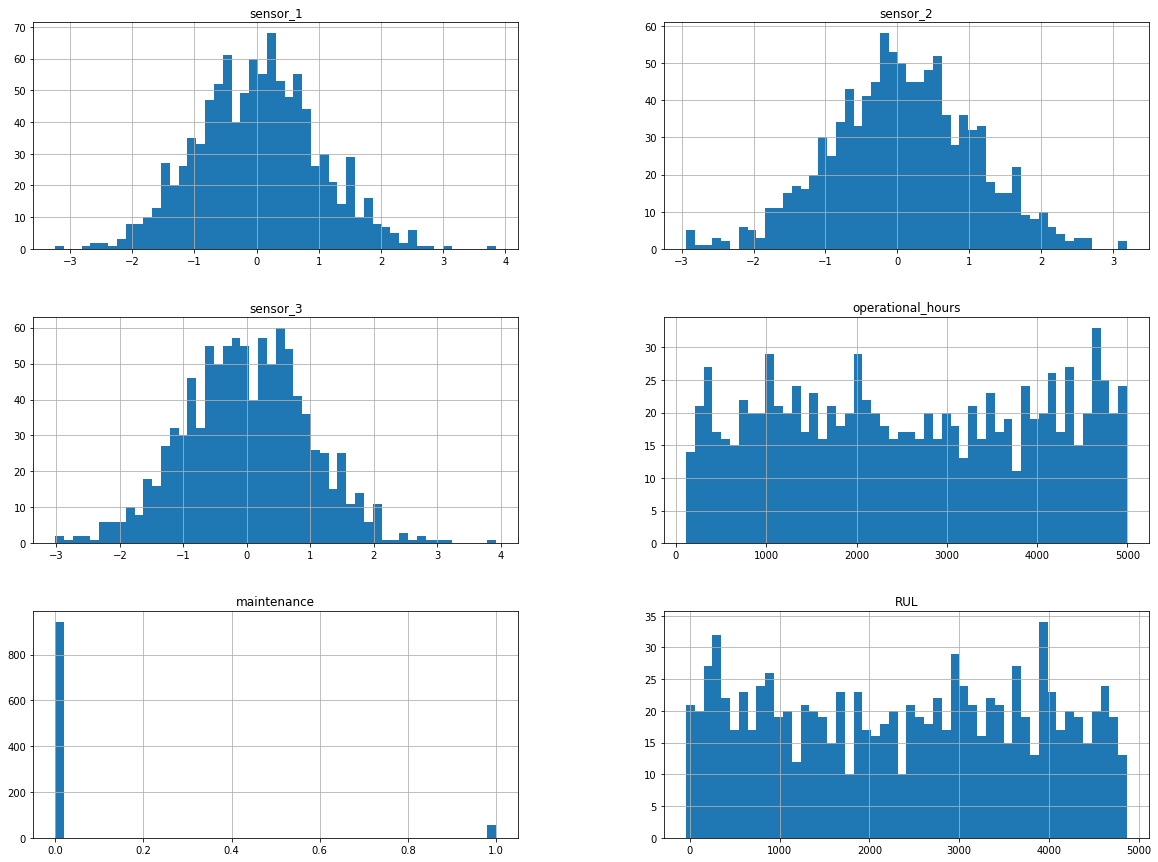

In [6]:
# Generates histograms for all numerical columns 

%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Split data for Regression and Classification

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df[features], df[target_rul], test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(df[features], df[target_maintenance], test_size=0.2, random_state=42)

<AxesSubplot:xlabel='operational_hours', ylabel='RUL'>

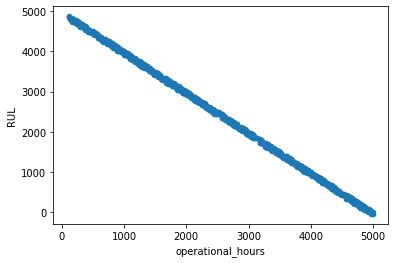

In [8]:
# Visualize the Data

df.plot(kind="scatter", x="operational_hours", y="RUL")

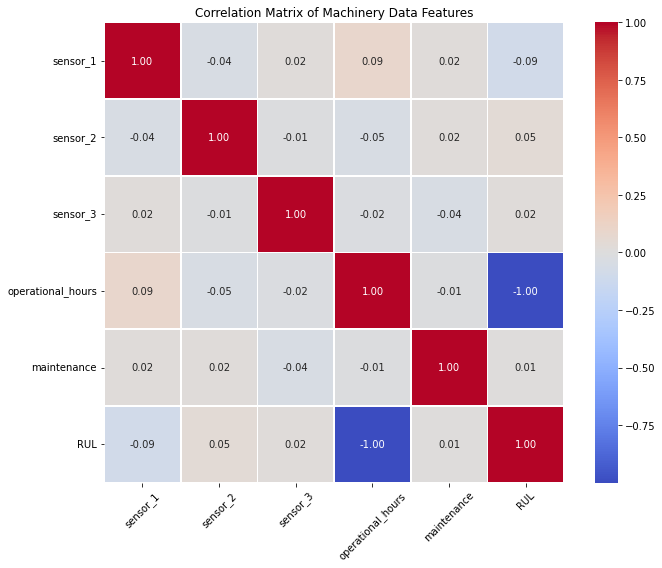

In [9]:
# Compute Correlation matrix (correlation coefficients between variables)
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Machinery Data Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
# Data Cleaning / Handle missing values if any
print("Missing values per column:")
print(df.isnull().sum())

print("\nPercentage of missing values per column:")
print(df.isnull().mean() * 100)

Missing values per column:
sensor_1             0
sensor_2             0
sensor_3             0
operational_hours    0
maintenance          0
RUL                  0
dtype: int64

Percentage of missing values per column:
sensor_1             0.0
sensor_2             0.0
sensor_3             0.0
operational_hours    0.0
maintenance          0.0
RUL                  0.0
dtype: float64


In [11]:
df.fillna(method='ffill', inplace=True)

In [12]:
df.head(15)

,sensor_1,sensor_2,sensor_3,operational_hours,maintenance,RUL
0,0.496714,1.399355,-0.675178,831,0,4167.779109
1,-0.138264,0.924634,-0.144519,4061,0,937.137258
2,0.647689,0.059630,-0.792420,4801,0,197.222359
3,1.523030,-0.646937,-0.307962,2604,0,2393.654227
4,-0.234153,0.698223,-1.893615,714,0,4285.083772
5,-0.234137,0.393485,0.213294,3906,0,1092.711130
6,1.579213,0.895193,0.001205,1819,0,3177.235519
7,0.767435,0.635172,-0.817089,4869,0,126.650001
8,-0.469474,1.049553,0.659246,1687,0,3307.410677
9,0.542560,-0.535235,0.937570,1711,0,3282.465782


In [13]:
# Feature Scaling / StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [14]:
# Train Regression Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg_model = RandomForestRegressor(n_estimators=500, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate on train data
y_pred_reg = reg_model.predict(X_train_reg)
mse_reg = mean_squared_error(y_train_reg, y_pred_reg)
print(f"Regression Model MSE on train data: {mse_reg}")

# Predict and evaluate on test data
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Model MSE on test data: {mse_reg}")


Regression Model MSE on train data: 160.36607906903438
Regression Model MSE on test data: 1096.7659471114828


In [15]:
# Train Classification Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_model = RandomForestClassifier(n_estimators=300,
    max_depth=8,
    min_samples_split=6,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced',
    n_jobs=-1)
clf_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate on train data
y_pred_clf = clf_model.predict(X_train_clf)
accuracy_clf = accuracy_score(y_train_clf, y_pred_clf)
print(f"Classification Model Accuracy on train data: {accuracy_clf}")
print(classification_report(y_train_clf, y_pred_clf))

# Predict and evaluate on test data
y_pred_clf = clf_model.predict(X_test_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Model Accuracy on test data: {accuracy_clf}")
print(classification_report(y_test_clf, y_pred_clf))


Classification Model Accuracy on train data: 0.98
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       751
           1       0.78      0.94      0.85        49

    accuracy                           0.98       800
   macro avg       0.89      0.96      0.92       800
weighted avg       0.98      0.98      0.98       800

Classification Model Accuracy on test data: 0.91
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       191
           1       0.00      0.00      0.00         9

    accuracy                           0.91       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.91      0.91      0.91       200



In [16]:
# Train Clustering Model (Anomaly Detection, Support Predictive Maintenance)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

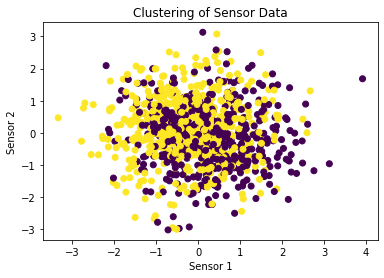

In [17]:
# Visualize Clustering Results
plt.scatter(df['sensor_1'], df['sensor_2'], c=df['cluster'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Clustering of Sensor Data')
plt.show()

In [18]:
def predict_maintenance(features):
    # Predict RUL
    rul_pred = reg_model.predict([features])
    
    # Predict maintenance status
    maint_pred = clf_model.predict([features])
    
    # Predict cluster (anomaly detection)
    cluster_pred = kmeans.predict([features])
    
    return {
        'RUL Prediction': rul_pred[0],
        'Maintenance Prediction': 'Needs Maintenance' if maint_pred[0] == 1 else 'Normal',
        'Anomaly Detection': 'Anomaly' if cluster_pred[0] == 1 else 'Normal'
    }

In [19]:
# Example Prediction
features = [0.496714153, 1.399355437, -0.675178275, 831]
prediction = predict_maintenance(features)
print(prediction)

{'RUL Prediction': 4145.933569334, 'Maintenance Prediction': 'Normal', 'Anomaly Detection': 'Normal'}


In [20]:
features = [-0.219671888, -0.348652134, 0.000527959, 4995]
prediction = predict_maintenance(features)
print(prediction)

{'RUL Prediction': 1.6458845120159902, 'Maintenance Prediction': 'Needs Maintenance', 'Anomaly Detection': 'Normal'}


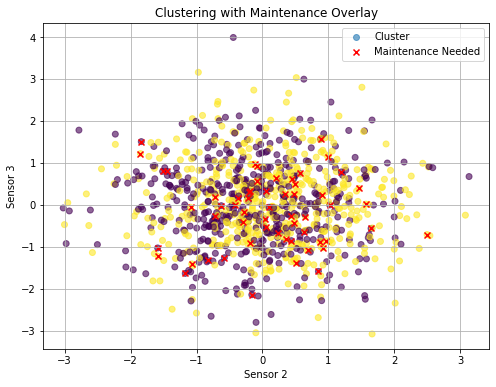

In [21]:
# Clustering Result With Maintenance Overlay
# Color code clusters and highlight points with maintenance == 1.

plt.figure(figsize=(8, 6))
plt.scatter(df['sensor_2'], df['sensor_3'], c=df['cluster'], cmap='viridis', alpha=0.6, label='Cluster')
plt.scatter(df[df['maintenance'] == 1]['sensor_2'],
            df[df['maintenance'] == 1]['sensor_3'],
            color='red', marker='x', label='Maintenance Needed')
plt.xlabel('Sensor 2')
plt.ylabel('Sensor 3')
plt.title('Clustering with Maintenance Overlay')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Feature Selection (Prevents Data leakage, Improves model performance, Correct Workflow, Reduces overfitting)
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'

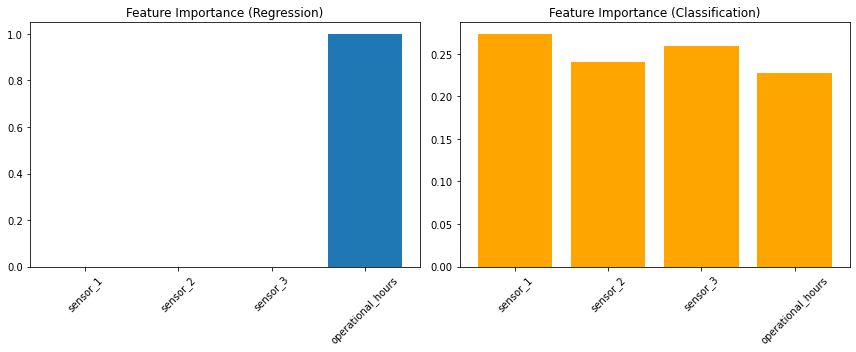

In [23]:
# Plot: Feature Importance (Regression + Classification)
# Visualize which features are important for each model

importances_reg = reg_model.feature_importances_
importances_clf = clf_model.feature_importances_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(features, importances_reg)
plt.title('Feature Importance (Regression)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(features, importances_clf, color='orange')
plt.title('Feature Importance (Classification)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [24]:
# Regression Model with Cross-Validation (RUL prediction)
# Create K-Fold cross-validator

kfold_reg = KFold(n_splits=8, shuffle=True, random_state=42)

# Use neg_mean_squared_error because scikit-learn expects higher scores to be better
mse_scores = cross_val_score(
    reg_model, df[features], df[target_rul],
    scoring='neg_mean_squared_error',
    cv=kfold_reg
)

# Convert to positive MSE
mse_scores = -mse_scores
print("Cross-Validated MSE Scores (Regression):", mse_scores)
print("Average MSE:", mse_scores.mean())

# Train the model on training set
reg_model.fit(X_train_reg, y_train_reg)

# Predict on training and test sets
y_train_pred = reg_model.predict(X_train_reg)
y_test_pred = reg_model.predict(X_test_reg)

# Calculate MSE
train_mse = mean_squared_error(y_train_reg, y_train_pred)
test_mse = mean_squared_error(y_test_reg, y_test_pred)

print(f"\nFinal Model Performance:")
print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")

Cross-Validated MSE Scores (Regression): [1178.17177115 1022.72585416 1198.06351714 1286.89067056 1291.89756012
 1208.78928497 1026.21158387  863.49225815]
Average MSE: 1134.5303125154942

Final Model Performance:
Train MSE: 160.366
Test MSE: 1096.766


In [25]:
# Classification Model with Cross-Validation (Maintenance prediction)
# StratifiedKFold ensures balanced classes in each fold

kfold_clf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(
    clf_model, df[features], df[target_maintenance],
    scoring='accuracy',
    cv=kfold_clf
)

print("Cross-Validated Accuracy Scores (Classification):", accuracy_scores)
print("Average Accuracy:", accuracy_scores.mean())

# Train the model on training set
clf_model.fit(X_train_clf, y_train_clf)
                               

# Predict and evaluate on train data
y_pred_clf = clf_model.predict(X_train_clf)
accuracy_clf = accuracy_score(y_train_clf, y_pred_clf)
print(f"Classification Model Accuracy on train data: {accuracy_clf}")
print(classification_report(y_train_clf, y_pred_clf))

# Predict and evaluate on test data
y_pred_clf = clf_model.predict(X_test_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Model Accuracy on test data: {accuracy_clf}")
print(classification_report(y_test_clf, y_pred_clf))

Cross-Validated Accuracy Scores (Classification): [0.93 0.92 0.89 0.93 0.93 0.91 0.91 0.93 0.94 0.92]
Average Accuracy: 0.9209999999999999
Classification Model Accuracy on train data: 0.98
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       751
           1       0.78      0.94      0.85        49

    accuracy                           0.98       800
   macro avg       0.89      0.96      0.92       800
weighted avg       0.98      0.98      0.98       800

Classification Model Accuracy on test data: 0.91
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       191
           1       0.00      0.00      0.00         9

    accuracy                           0.91       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.91      0.91      0.91       200



In [36]:
# Create pipeline

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Pipeline for regression
reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Pipeline for classification
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [37]:
# fine-tune your Random Forest using GridSearchCV (Regression + Classification)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


param_grid_reg = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

param_grid_clf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [38]:
# Set up GridSearchCV with your pipeline

from sklearn.pipeline import Pipeline

# Assuming reg_pipeline and clf_pipeline are your pipelines

grid_search_reg = GridSearchCV(reg_pipeline, param_grid_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_clf = GridSearchCV(clf_pipeline, param_grid_clf, cv=5, scoring='accuracy', n_jobs=-1)

In [39]:
# Fit GridSearch to your training data

grid_search_reg.fit(X_train_reg, y_train_reg)
grid_search_clf.fit(X_train_clf, y_train_clf)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                       

In [40]:
# Check best parameters and best scores

print("Best parameters for regression:", grid_search_reg.best_params_)
print("Best CV MSE (negative):", grid_search_reg.best_score_)

print("Best parameters for classification:", grid_search_clf.best_params_)
print("Best CV accuracy:", grid_search_clf.best_score_)

Best parameters for regression: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best CV MSE (negative): -1148.5692502554436
Best parameters for classification: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best CV accuracy: 0.93875


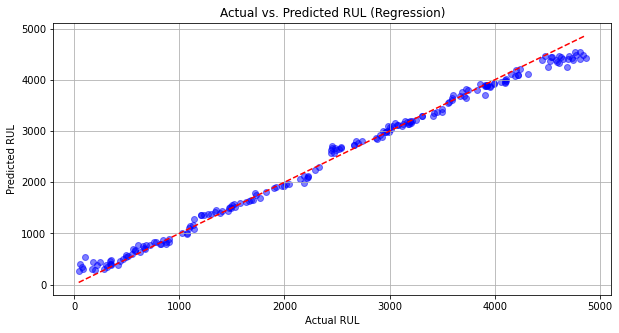

In [39]:
# Plot: Actual vs. Predicted RUL (Regression)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL (Regression)')
plt.grid(True)
plt.show()

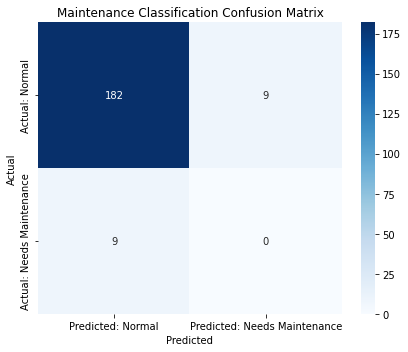

In [27]:
# Plot: Predicted values against Actual values (Classification)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Normal', 'Predicted: Needs Maintenance'],
            yticklabels=['Actual: Normal', 'Actual: Needs Maintenance'])
plt.title("Maintenance Classification Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()